In [1]:
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import time
import re 
from pandas import DataFrame 

In [2]:
import pandas as pd
import numpy as np

In [48]:
news_list_daum = []
for n in range(1, 36):
    raw = requests.get("https://search.daum.net/search?nil_suggest=btn&w=news&DA=STC&cluster=y&q=%EC%BD%94%EB%A1%9C%EB%82%98%EB%B8%94%EB%A3%A8&sd=20200930021535&ed=20210930021535&sort=accuracy&period=y&p="+str(n)+"&article_type=report")
    html = bs(raw.text, 'html.parser')
    articles = html.select("div.wrap_cont")

    for ar2 in articles:
        news_data2 = {}
        
        summary = ar2.select_one("a.tit_main.fn_tit_u").text
        summaryUrl = ar2.select_one("a.f_nb")['href']
        source = ar2.select("span.cont_info > span.f_nb")[0].text
        day = ar2.select("span.cont_info > span.f_nb")[1].text

        news_data2['source'] = ar2.select_one("a.tit_main.fn_tit_u").text
        news_list_daum.append(news_data2)
        news_data2['content'] = ar2.select_one("a.f_nb")['href']
        news_list_daum.append(news_data2)
        news_data2['media'] = ar2.select("span.cont_info > span.f_nb")[0].text
        news_list_daum.append(news_data2)
        news_data2['day'] = ar2.select("span.cont_info > span.f_nb")[1].text
        news_list_daum.append(news_data2)

        #print(title)
        #print(summary)
        #print(summaryUrl)
        # 기사별로 구분을 위해 구분선 삽입 
        #print("="*50)

In [198]:
news_list_daum

source  \
0                 시립중랑청소년센터, 도시농업을 통한 '코로나 블루 극복' 지원   
1    구립서초유스센터, 메타버스 활용 전시회 개최해 시민의 '코로나 블루' 해소에 앞장서다   
2                 OK금융, '코로나블루' 극복 위한 반려식물 나눔 캠페인 펼쳐   
3        코로나 블루 이겨내는 너의 음악을 들려줘 '청소년 클래식 챌린지' 참가자 모집   
4                          "청소년 코로나 블루, 클래식으로 헤쳐나가요"   
..                                               ...   
279                        미래로 한발 더, 지속가능한 해양경제로의 전환   
280               안동 '미래도시 안틀란티스' 미션게임으로 소소한 일탈 즐겨요!   
281                  2020 서울시 청소년 어울림마당 "10월에도 만나요~"   
282             경상북도 청년문화보부상 '니캉내캉 버스킹' 10월 15일 첫 방송   
283                   포스코, 세계철강협회 '지속가능경영 최우수 기업' 선정   

                                         content   media         day  
0    http://v.media.daum.net/v/20210831174705387   뉴스와이어  2021.08.31  
1    http://v.media.daum.net/v/20210909164703741   뉴스와이어  2021.09.09  
2    http://v.media.daum.net/v/20210709092901344  파이낸셜뉴스  2021.07.09  
3    http://v.media.daum.net/v/20210616151704867   뉴스와이어  2021.06.16  
4    http://v.media.daum.net/v/20210521162706158   뉴스와이어  2021.05.21  
..                                           ...     ...         ...  
279  http://v.media.daum.net/v/20201021140530912   정책브리핑  2020.10.21  
280  http://v.media.daum.net/v/20201008164119683   투어코리아  2020.10.08  
281  http://v.media.daum.net/v/20201018094703722   뉴스와이어  2020.10.18  
282  http://v.media.daum.net/v/20201015131703769   뉴스와이어  2020.10.15  
283  http://v.media.daum.net/v/20201015151509814    노컷뉴스  2020.10.15  

[284 rows x 4 columns]

In [199]:
news_list_daum = pd.DataFrame(news_list_daum)
news_list_daum = news_list_daum.drop_duplicates()
news_list_daum = news_list_daum.reset_index(drop = True)

In [200]:
news_list_daum

source  \
0                 시립중랑청소년센터, 도시농업을 통한 '코로나 블루 극복' 지원   
1    구립서초유스센터, 메타버스 활용 전시회 개최해 시민의 '코로나 블루' 해소에 앞장서다   
2                 OK금융, '코로나블루' 극복 위한 반려식물 나눔 캠페인 펼쳐   
3        코로나 블루 이겨내는 너의 음악을 들려줘 '청소년 클래식 챌린지' 참가자 모집   
4                          "청소년 코로나 블루, 클래식으로 헤쳐나가요"   
..                                               ...   
279                        미래로 한발 더, 지속가능한 해양경제로의 전환   
280               안동 '미래도시 안틀란티스' 미션게임으로 소소한 일탈 즐겨요!   
281                  2020 서울시 청소년 어울림마당 "10월에도 만나요~"   
282             경상북도 청년문화보부상 '니캉내캉 버스킹' 10월 15일 첫 방송   
283                   포스코, 세계철강협회 '지속가능경영 최우수 기업' 선정   

                                         content   media         day  
0    http://v.media.daum.net/v/20210831174705387   뉴스와이어  2021.08.31  
1    http://v.media.daum.net/v/20210909164703741   뉴스와이어  2021.09.09  
2    http://v.media.daum.net/v/20210709092901344  파이낸셜뉴스  2021.07.09  
3    http://v.media.daum.net/v/20210616151704867   뉴스와이어  2021.06.16  
4    http://v.media.daum.net/v/20210521162706158   뉴스와이어  2021.05.21  
..                                           ...     ...         ...  
279  http://v.media.daum.net/v/20201021140530912   정책브리핑  2020.10.21  
280  http://v.media.daum.net/v/20201008164119683   투어코리아  2020.10.08  
281  http://v.media.daum.net/v/20201018094703722   뉴스와이어  2020.10.18  
282  http://v.media.daum.net/v/20201015131703769   뉴스와이어  2020.10.15  
283  http://v.media.daum.net/v/20201015151509814    노컷뉴스  2020.10.15  

[284 rows x 4 columns]

In [52]:
news_list_daum.shape

(284, 4)

In [202]:
daum = news_list_daum.copy()

In [203]:
daum = daum.drop(daum.index[192])

In [204]:
daum = daum.reset_index(drop = True)

In [205]:
daum.shape

(283, 4)

In [206]:
main_cts =[]

for i in range(0, len(news_list_daum['content'])) :
    resp = requests.get(news_list_daum['content'][i])
    soup = bs(resp.text, "html.parser")
    
    articles = soup.select("div.news_view")
    for ar in articles:
        news_data={}
        content = ar.select_one("section").text
        news_data['content'] = ar.select_one("section").text
        main_cts.append(news_data)

In [207]:
main_cts = pd.DataFrame(main_cts)
main_cts.isnull().any()
main_cts

content
0    \n\n\n\n 한국청소년연맹(총재 임호영)이 서울시(시장 오세훈)에서 위탁받아 운...
1    \n\n\n\n 코로나19가 장기화됨에 따라 대규모 행사, 문화활동 등이 축소돼 문...
2    \n\n            [파이낸셜뉴스] \n           \n\n\n\n...
3    \n\n\n\n 서울시립서대문청소년센터는(이하 서대문센터) 청소년 클래식 영상챌린지...
4    \n\n\n\n 코로나19가 장기화 되는 가운데 서울시립서대문청소년센터(이하 서대문...
..                                                 ...
278  \n미래로 한발 더, 지속가능한 해양경제로의 전환\n- 10. 27.~29. 개최,...
279  \n\n\n\n            안동 선성현 문화단지\n           \n...
280  \n\n\n\n 서울특별시와 여성가족부가 주최하고 시립보라매청소년센터가 주관하는 2...
281  \n\n\n\n 탑 크리에이터와 뮤지션이 출연하는 비대면 공연 프로그램 ‘경상북도 ...
282  \n\n\n\n            포스코의 트리톤 어초를 활용한 바다숲 조성 사업...

[283 rows x 1 columns]

In [208]:
daum['news_text'] = main_cts['content']

In [96]:
daum

source  \
0                 시립중랑청소년센터, 도시농업을 통한 '코로나 블루 극복' 지원   
1    구립서초유스센터, 메타버스 활용 전시회 개최해 시민의 '코로나 블루' 해소에 앞장서다   
2                 OK금융, '코로나블루' 극복 위한 반려식물 나눔 캠페인 펼쳐   
3        코로나 블루 이겨내는 너의 음악을 들려줘 '청소년 클래식 챌린지' 참가자 모집   
4                          "청소년 코로나 블루, 클래식으로 헤쳐나가요"   
..                                               ...   
278                        미래로 한발 더, 지속가능한 해양경제로의 전환   
279               안동 '미래도시 안틀란티스' 미션게임으로 소소한 일탈 즐겨요!   
280                  2020 서울시 청소년 어울림마당 "10월에도 만나요~"   
281             경상북도 청년문화보부상 '니캉내캉 버스킹' 10월 15일 첫 방송   
282                   포스코, 세계철강협회 '지속가능경영 최우수 기업' 선정   

                                         content   media         day  \
0    http://v.media.daum.net/v/20210831174705387   뉴스와이어  2021.08.31   
1    http://v.media.daum.net/v/20210909164703741   뉴스와이어  2021.09.09   
2    http://v.media.daum.net/v/20210709092901344  파이낸셜뉴스  2021.07.09   
3    http://v.media.daum.net/v/20210616151704867   뉴스와이어  2021.06.16   
4    http://v.media.daum.net/v/20210521162706158   뉴스와이어  2021.05.21   
..                                           ...     ...         ...   
278  http://v.media.daum.net/v/20201021140530912   정책브리핑  2020.10.21   
279  http://v.media.daum.net/v/20201008164119683   투어코리아  2020.10.08   
280  http://v.media.daum.net/v/20201018094703722   뉴스와이어  2020.10.18   
281  http://v.media.daum.net/v/20201015131703769   뉴스와이어  2020.10.15   
282  http://v.media.daum.net/v/20201015151509814    노컷뉴스  2020.10.15   

                                             news_text  
0    \n\n\n\n 한국청소년연맹(총재 임호영)이 서울시(시장 오세훈)에서 위탁받아 운...  
1    \n\n\n\n 코로나19가 장기화됨에 따라 대규모 행사, 문화활동 등이 축소돼 문...  
2    \n\n            [파이낸셜뉴스] \n           \n\n\n\n...  
3    \n\n\n\n 서울시립서대문청소년센터는(이하 서대문센터) 청소년 클래식 영상챌린지...  
4    \n\n\n\n 코로나19가 장기화 되는 가운데 서울시립서대문청소년센터(이하 서대문...  
..                                                 ...  
278  \n미래로 한발 더, 지속가능한 해양경제로의 전환\n- 10. 27.~29. 개최,...  
279  \n\n\n\n            안동 선성현 문화단지\n           \n...  
280  \n\n\n\n 서울특별시와 여성가족부가 주최하고 시립보라매청소년센터가 주관하는 2...  
281  \n\n\n\n 탑 크리에이터와 뮤지션이 출연하는 비대면 공연 프로그램 ‘경상북도 ...  
282  \n\n\n\n            포스코의 트리톤 어초를 활용한 바다숲 조성 사업...  

[283 rows x 5 columns]

In [209]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result

daum['clean_text'] = daum['news_text'].apply(lambda x: text_cleaning(x))
#news_title
daum.head(5)

source  \
0               시립중랑청소년센터, 도시농업을 통한 '코로나 블루 극복' 지원   
1  구립서초유스센터, 메타버스 활용 전시회 개최해 시민의 '코로나 블루' 해소에 앞장서다   
2               OK금융, '코로나블루' 극복 위한 반려식물 나눔 캠페인 펼쳐   
3      코로나 블루 이겨내는 너의 음악을 들려줘 '청소년 클래식 챌린지' 참가자 모집   
4                        "청소년 코로나 블루, 클래식으로 헤쳐나가요"   

                                       content   media         day  \
0  http://v.media.daum.net/v/20210831174705387   뉴스와이어  2021.08.31   
1  http://v.media.daum.net/v/20210909164703741   뉴스와이어  2021.09.09   
2  http://v.media.daum.net/v/20210709092901344  파이낸셜뉴스  2021.07.09   
3  http://v.media.daum.net/v/20210616151704867   뉴스와이어  2021.06.16   
4  http://v.media.daum.net/v/20210521162706158   뉴스와이어  2021.05.21   

                                           news_text  \
0  \n\n\n\n 한국청소년연맹(총재 임호영)이 서울시(시장 오세훈)에서 위탁받아 운...   
1  \n\n\n\n 코로나19가 장기화됨에 따라 대규모 행사, 문화활동 등이 축소돼 문...   
2  \n\n            [파이낸셜뉴스] \n           \n\n\n\n...   
3  \n\n\n\n 서울시립서대문청소년센터는(이하 서대문센터) 청소년 클래식 영상챌린지...   
4  \n\n\n\n 코로나19가 장기화 되는 가운데 서울시립서대문청소년센터(이하 서대문...   

                                          clean_text  
0   한국청소년연맹총재 임호영이 서울시시장 오세훈에서 위탁받아 운영하는 시립중랑청소년센...  
1   코로나가 장기화됨에 따라 대규모 행사 문화활동 등이 축소돼 문화적 갈증과 우울감을...  
2              파이낸셜뉴스                       금융그룹은...  
3   서울시립서대문청소년센터는이하 서대문센터 청소년 클래식 영상챌린지 클플리를 월 일까...  
4   코로나가 장기화 되는 가운데 서울시립서대문청소년센터이하 서대문청소년센터는 침체돼 ...

In [111]:
daum['clean_text'][10]

'청년세대  코로나 위기 극복  격차 해소 미래도약 지원을 위한 반값 등록금 실현 등 청년특별대책 개 과제 발표  국가장학금 지원단가  구간 만원  만원 구간 만원 구간 만원  만원 으로 인상국무총리 주재 청년정책조정위원회 코로나 극복 코로나로 인한 청년세대의 어려움에 적극적으로 대응하겠습니다 청년 일자리 도약 장려금 신설만명 마음건강 바우처 만명 지원만원개월 코로나 졸업반 고졸청년 패키지 지원 강화직무교육취업연계장려금후학습장학금 청년세대 격차해소 청년 모두가 공정한 출발선에서 시작하도록 기반을 다지겠습니다 국가장학금 지원 대폭 확대해 중산층까지 반값등록금 실현기초차상위 만 분위 만 분위 만만만 주거취약청년 만명 월세 특별 한시지원 신설월 최대 만원 년 지역주도형 청년일자리 사업 지속개편만명 중기재직 청년 지원 강화재직자내일채움공제 산단교통비 중기 전세자금 대출 일몰 연장 대 맞춤형 자산형성 프로그램 신설    만원 이하 청년내일저축계좌만명 저축액의 배를 정부지원  만원 이하 청년희망적금저축장려금 최대  지급  만원 이하 소득공제 장기펀드납입액의  소득공제 미래도약 청년의 당당한 자립 청년의 꿈과 도전을 지원합니다 청년창업활성화 대 패키지 지원청년창업펀드 창업자금 테크스타 보증 청년우대형 청약통장 년까지 연장 군장병 사회복귀 지원장병사회복귀준비금 정부매칭 최대 만원 지원 전역시 천만원 수령 디지털 트레이닝크레딧 대폭 확대만명만명 민관협력 청년 친화적  지원 신설현장형 직무훈련일경험 지원 채용관행 개선 등정부는 월 일목 김부겸 국무총리 주재 청년정책조정위원회에서 관계부처 합동으로 수립한청년특별대책을 발표하였습니다배경 코로나 이후 고용을 중심으로 청년 삶의 여건이 악화되면서 미래주역인 청년들이 당당한 홀로서기에 어려움을 겪고 있습니다최근 고용지표는 개선되고 있지만 채용관행 변화 등으로 청년층 체감 고용상황은 어려운 상황이며 노동시장으로의 이행이 지연되고 있습니다   전년동월 대비 대졸자 평균졸업소요기간 개월 증가년 개월 휴학경험비율  증가경활인구 청년층 부가조사 

In [104]:
import re
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }
def cleansing(text):
    
    punct ='[a-zA-z]'
    text = re.sub(pattern = punct, repl =' ', string = text)
    
    punct = r'\d+'
    text = re.sub(pattern = punct, repl =' ', string = text)
    
    punct = r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]'
    text = re.sub(pattern = punct, repl =' ', string = text)


    punct = '(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9-\]+.\[a-zA-Z0-9-.\]+)'
    text = re.sub(pattern = punct, repl =' ', string = text)
    
    punct = '(http|ftp|https)://(?:[-\w.]|(?:\da-fA-F]{2}))+'
    text = re.sub(pattern = punct, repl =' ', string = text)
    
    punct = '[\r|\n]'
    text = re.sub(pattern = punct, repl =' ', string = text)
    
    punct = '[^\w\s]'
    text = re.sub(pattern = punct, repl =' ', string = text)
    
    punct = re.compile(r'\s+')
    text = re.sub(pattern = punct, repl =' ', string = text)
    
    punct = '[\{\}\[\]/?.;;:|\)*~`!^\-_+<>▶▽♡◀ㅡ@\#$%&\\\=\(\'\"ⓒ(\n)(\t)]'
    text = re.sub(pattern = punct, repl ='', string = text)
    
    text = text.replace("오류를 우회하기 위한 함수 추가", "")   
    text = text.replace("이 뉴스는 기업기관단체가 뉴스와이어를 통해 배포한 보도자료입니다출처", "")
   
    return(text)

In [210]:
for i in range(len(daum['clean_text'])):
    daum['clean_text'][i] = cleansing(daum['clean_text'][i])

In [211]:
#불용어 제거하기

stop_words = '아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 있다 있는 기자 지난해 수'
stop_words=stop_words.split(' ')

stop_words2='이전 무려 역시 말로 위해 올해 내년 개월 이제 라며 일부 전체 달리 최대 최소 최소한 최대한 전혀 크게 예전 더욱 여러 중인 내년 본격 취소 최근 위해 통해 제법 거슬러 면서 점도 먼저 세팅해 급증 이전 이후 대표 기자 대신 듬뿍 마음껏 대한 가장 올해 사진 잡고 뉴스 언론 기사 마치 거의 거나 이제 곳곳 구독 배포 무단 지난해 때문 '
stop_words2=stop_words2.split(' ')

stop_words3 ='동동 잠깐 만큼 아예 산다 역사상 이처럼 자주 지난 근처 이란 고작 더니 조원 억원 오른쪽 왼쪽 그대로 경향신문 이미지 절찬 이면 발휘 신규 이자 듀오 최초 이어진 적극 요즘 쓰기 줄자 덩달아 가운데 더욱이 사이 세대 안팎 만원 천원 편집 천원 제공 타고 널리 이나 맞이 관련 대체 꼽았다 원래 처음 오늘 수백 수천 수만 미터 세기 유일 아래 위 가까이 워낙 섣불리 진짜 진심 이지 굳이 동시 하나로 실제 일일이 아무 거지 수준 여럿 토대 구내외 절반 기간 정작 직접 처럼 야기 앞서 간다 제일 년대 억원 선정 계속 제일 아예 이름 마찬가지 등장 서로 전국 차마 한편 가운데 이하 이상 마침 사이 기준 역대 최초 클릭 온갖 초래 거대 가까이 비롯 차례 스스로 그동안 매일경제 버티고 과언 달랑 이참 줄줄이 주춤 엤날 예외 그간 부쩍 유독 유의 대폭 구석 당시 덕분 이왕이면 지난달 달 한몫 기계로 마련 마주 모든 기존 누적 무작정 미리 실시간 일리 제대로 톡톡 마지막 네이버 뉴스 미디어'
stop_words3=stop_words3.split(' ')

In [212]:
from konlpy.tag import Okt
from collections import Counter

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]    
    #불용어 제거하기
    nouns = [noun for noun in nouns if noun not in stop_words]
    nouns = [noun for noun in nouns if noun not in stop_words2]
    nouns = [noun for noun in nouns if noun not in stop_words3]
    return nouns

daum['nouns'] = daum['clean_text'].apply(lambda x: get_nouns(x))
print(daum.shape)
daum.head()

(283, 7)


source  \
0               시립중랑청소년센터, 도시농업을 통한 '코로나 블루 극복' 지원   
1  구립서초유스센터, 메타버스 활용 전시회 개최해 시민의 '코로나 블루' 해소에 앞장서다   
2               OK금융, '코로나블루' 극복 위한 반려식물 나눔 캠페인 펼쳐   
3      코로나 블루 이겨내는 너의 음악을 들려줘 '청소년 클래식 챌린지' 참가자 모집   
4                        "청소년 코로나 블루, 클래식으로 헤쳐나가요"   

                                       content   media         day  \
0  http://v.media.daum.net/v/20210831174705387   뉴스와이어  2021.08.31   
1  http://v.media.daum.net/v/20210909164703741   뉴스와이어  2021.09.09   
2  http://v.media.daum.net/v/20210709092901344  파이낸셜뉴스  2021.07.09   
3  http://v.media.daum.net/v/20210616151704867   뉴스와이어  2021.06.16   
4  http://v.media.daum.net/v/20210521162706158   뉴스와이어  2021.05.21   

                                           news_text  \
0  \n\n\n\n 한국청소년연맹(총재 임호영)이 서울시(시장 오세훈)에서 위탁받아 운...   
1  \n\n\n\n 코로나19가 장기화됨에 따라 대규모 행사, 문화활동 등이 축소돼 문...   
2  \n\n            [파이낸셜뉴스] \n           \n\n\n\n...   
3  \n\n\n\n 서울시립서대문청소년센터는(이하 서대문센터) 청소년 클래식 영상챌린지...   
4  \n\n\n\n 코로나19가 장기화 되는 가운데 서울시립서대문청소년센터(이하 서대문...   

                                          clean_text  \
0   한국청소년연맹총재 임호영이 서울시시장 오세훈에서 위탁받아 운영하는 시립중랑청소년센...   
1   코로나가 장기화됨에 따라 대규모 행사 문화활동 등이 축소돼 문화적 갈증과 우울감을...   
2   파이낸셜뉴스 금융그룹은 소셜벤처기업 트리플래닛과 서울 지역 내 노인종합복지관 곳에...   
3   서울시립서대문청소년센터는이하 서대문센터 청소년 클래식 영상챌린지 클플리를 월 일까...   
4   코로나가 장기화 되는 가운데 서울시립서대문청소년센터이하 서대문청소년센터는 침체돼 ...   

                                               nouns  
0  [한국, 청소년, 연맹, 총재, 임호, 서울시, 시장, 오세훈, 위탁, 운영, 시립...  
1  [코로나, 장기, 대규모, 행사, 문화, 활동, 축소, 문화, 갈증, 우울, 시민,...  
2  [파이낸셜뉴스, 금융, 그룹, 소셜, 벤처기업, 트리플래닛, 서울, 지역, 노인, ...  
3  [시립, 서대문, 청소년, 센터, 서대문, 센터, 청소년, 클래식, 영상, 린지, ...  
4  [코로나, 장기, 서울, 시립, 서대문, 청소년, 센터, 서대문, 청소년, 센터, ...

In [115]:
transactions_ct = daum['nouns'].tolist()
transactions_ct = [transaction for transaction in transactions_ct if transaction] # 공백 문자열을 방지합니다.
#print(transactions_ct)

In [213]:
transactions_ct

[['한국',
  '청소년',
  '연맹',
  '총재',
  '임호',
  '서울시',
  '시장',
  '오세훈',
  '위탁',
  '운영',
  '시립',
  '청소년',
  '센터',
  '관장',
  '박충',
  '서울',
  '시내',
  '청소년',
  '시설',
  '학교',
  '기관',
  '대상',
  '이동식',
  '미니',
  '텃밭',
  '설치',
  '프로젝트',
  '진행',
  '가족',
  '텃밭',
  '나누기',
  '서울시',
  '도시농업',
  '주관',
  '도시농업',
  '민간',
  '단체',
  '사업',
  '옥상',
  '텃밭',
  '활용',
  '도시',
  '농업',
  '활성화',
  '청소년',
  '포함',
  '가족',
  '중심',
  '도시농업',
  '도시농업',
  '나누기',
  '도시농업',
  '나누기',
  '프로그램',
  '운영',
  '도시농업',
  '가족',
  '텃밭',
  '코딩',
  '화분',
  '도시농업',
  '나누기',
  '지역',
  '텃밭',
  '나누기',
  '도시농업',
  '반려',
  '식물',
  '나눔',
  '활동',
  '청소년',
  '이동식',
  '텃밭',
  '코로나',
  '장기',
  '화로',
  '정서',
  '어려움',
  '가족',
  '시민',
  '도시농업',
  '매개',
  '이해',
  '소통',
  '방법',
  '가족',
  '관계',
  '코로나',
  '블루',
  '극복',
  '노력',
  '가족',
  '텃밭',
  '나누기',
  '워킹',
  '스루',
  '부스',
  '활용',
  '반려',
  '식물',
  '키트',
  '나눔',
  '활동',
  '서울',
  '시민',
  '지원',
  '참가자',
  '프로그램',
  '도시농업',
  '접근성',
  '응답',
  '박충',
  '시립',
  '청소년',
  '센터',
  '관장',
  '코로나',
  '심리',
  '안정'

In [116]:
from apyori import apriori
# 연관 분석을 수행합니다.
results = list(apriori(transactions_ct,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))

#results

In [118]:
df = pd.DataFrame(results)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) & 
        (df['support'] >= 0.06)].sort_values(by='support',ascending = False)
df.head(10)

items   support                                 ordered_statistics  \
7790   (블루, 코로나)  0.954064         [((), (블루, 코로나), 0.9540636042402827, 1.0)]   
7743    (블루, 진행)  0.628975  [((), (블루, 진행), 0.6289752650176679, 1.0), ((블루...   
11959  (진행, 코로나)  0.625442  [((), (진행, 코로나), 0.6254416961130742, 1.0), ((진...   
11870  (지원, 코로나)  0.487633  [((), (지원, 코로나), 0.4876325088339223, 1.0), ((지...   
7736    (블루, 지원)  0.487633          [((), (블루, 지원), 0.4876325088339223, 1.0)]   
7590    (예정, 블루)  0.466431          [((), (예정, 블루), 0.4664310954063604, 1.0)]   
10332  (예정, 코로나)  0.466431  [((), (예정, 코로나), 0.4664310954063604, 1.0), ((예...   
10597  (운영, 코로나)  0.459364  [((), (운영, 코로나), 0.45936395759717313, 1.0), ((...   
7608    (운영, 블루)  0.452297  [((), (운영, 블루), 0.45229681978798586, 1.0), ((블...   
7481    (사업, 블루)  0.448763  [((), (사업, 블루), 0.44876325088339225, 1.0), ((블...   

       length  
7790        2  
7743        2  
11959       2  
11870       2  
7736        2  
7590        2  
10332       2  
10597       2  
7608        2  
7481        2

In [123]:
import networkx as nx
from nltk import Text
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [120]:
G = nx.Graph()
ar =(df['items'])
G.add_edges_from(ar)

In [121]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) /(max(nsize) - min(nsize))
nsize

array([2.00000000e+03, 1.85570057e+03, 6.64997962e+02, 5.65638591e+02,
       4.37847235e+02, 4.41087964e+02, 4.97510014e+02, 3.30158285e+02,
       3.30961876e+02, 3.29807128e+02, 3.05226924e+02, 4.24391403e+02,
       3.43170604e+02, 3.66223882e+02, 2.78262036e+02, 3.67360614e+02,
       3.25202795e+02, 3.58637344e+02, 3.62708376e+02, 2.74259954e+02,
       2.72448580e+02, 2.39081965e+02, 3.40592666e+02, 2.65191960e+02,
       3.59610794e+02, 2.27203713e+02, 2.30242390e+02, 2.75595775e+02,
       1.57530747e+02, 1.79459874e+02, 1.92200292e+02, 1.78057959e+02,
       1.73947993e+02, 3.14591847e+02, 1.91519724e+02, 1.80118434e+02,
       1.74014769e+02, 1.87898751e+02, 1.52380606e+02, 2.38147587e+02,
       2.26437091e+02, 1.23774829e+02, 1.86945416e+02, 1.44346336e+02,
       1.57236997e+02, 1.49638629e+02, 2.12605731e+02, 2.01405696e+02,
       1.09235925e+02, 2.36705731e+02, 1.17718797e+02, 1.56552194e+02,
       1.08924702e+02, 1.87721799e+02, 1.32883222e+02, 1.38986768e+02,
      

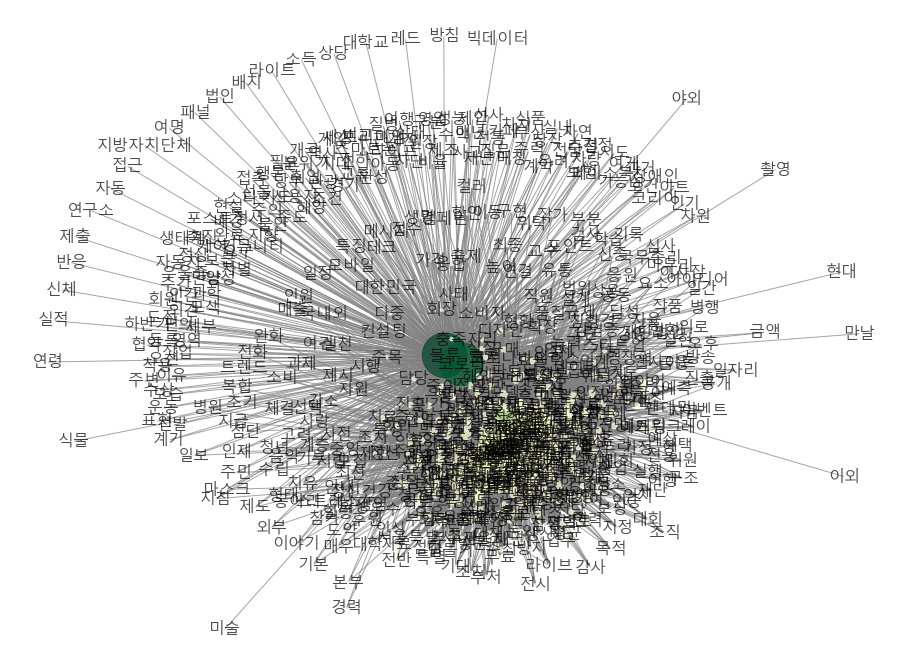

In [124]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16,12)); plt.axis('off')

nx.draw_networkx(G, font_family=font_name, font_size = 16,
                pos =pos, node_color =list(pr.values()), node_size = nsize,
                alpha = 0.7, edge_color ='.5', cmap = plt.cm.YlGn)

In [157]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
    
network_df = network_df.sample(n=100,
          weights='support'
) 

network_df.head()

source target   support
1299      관리     경제  0.095406
8474      센터     세계  0.130742
8873      활용    스마트  0.088339
1148      건강    전문가  0.088339
10443     핵심     장기  0.070671

In [146]:
#corpus_ct = "".join(daum['clean_text'].tolist())

In [137]:
#corpus_ct

In [156]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
a = list(daum['nouns'])
a1 = sum(a, [])
corpus_ct = " ".join(a1)
nouns_ct = nouns_tagger.nouns(corpus_ct)

for i in nouns_ct:
    if len(i) == 1:
       nouns_ct.remove(i)
count_ct = Counter(nouns_ct)

# 한글자 키워드를 제거합니다.
remove_char_counter_ct = Counter({x : count_ct[x] for x in count_ct if len(x) > 1})

# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter_ct.items(), columns=['node', 'nodesize']) 
node_df = node_df[node_df['nodesize'] > 150] # 시각화의 편의를 위해 ‘nodesize’ 150 이하는 제거합니다.


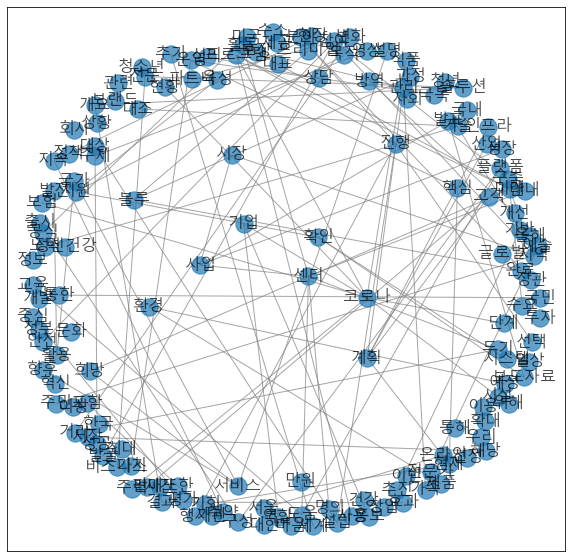

In [148]:
import networkx as nx
plt.figure(figsize=(10,10))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k= 0.6)

#nx.draw(G, pos=pos, node_size=sizes)
#nx.draw(G, pos=pos)
#nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=20)

nx.draw_networkx(G, font_family=font_name, font_size = 16, pos = pos, 
                 alpha = 0.7, edge_color ='.5', cmap = plt.cm.YlGn)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()

In [143]:
import requests
from bs4 import BeautifulSoup
import math
import pandas
import re
import operator
import time
import datetime
from konlpy.tag import Komoran

In [158]:
a = list(daum['nouns'])
a1 = sum(a, [])
corpus_ct = " ".join(a1)
nouns_ct = nouns_tagger.nouns(corpus_ct)

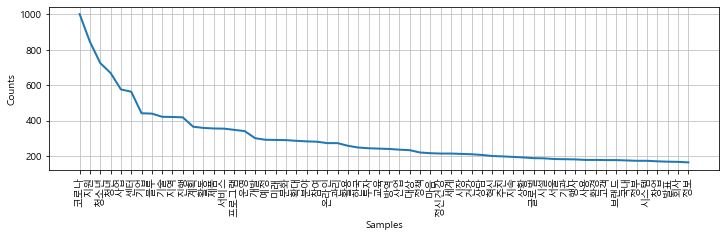

In [155]:
from nltk import Text
import matplotlib.pyplot as plt
from collections import Counter

plt.figure(figsize=(12, 3))
kolaw = Text(nouns_ct, name="kolaw")
kolaw.plot(60)
plt.show()

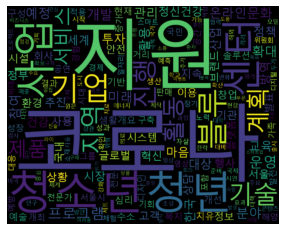

In [159]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = 'c:/Windows/Fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 800, background_color="Black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()), interpolation='bilinear')
plt.axis("off")
plt.show()

In [160]:
#간단한 LDA를 사용하여 한글 데이터 토픽 모델링하기

In [161]:
import konlpy
import re

# tokenization 함수를 만들어둠
def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)  ## ,.?!와 문자+숫자+_(\w)와 공백(\s)만 남김  # 앞에 r을 붙여주면 deprecation warning이 안뜸 (raw string으로 declare)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)   # stem=True로 설정하면 동사원형으로 바꿔서 return
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':  # 이 경우에는 형용사, 동사, 명사만 남김
            words.append(word)

    words_str = ' '.join(words)
    return words_str


# naver_list_df['content']를 하나씩 tokenize해서 list로 저장
tokenized_list = []

for text in daum['clean_text']:
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

283
한국 청소년 연맹 총재 임호 영 서울시 시장 오세훈 위탁 받아 운영 하는 시립 청소년 센터 관장 박충 서는 월 서울 시내 청소년 시설 및 학교 개 기관 여 명 대상 이동식 미니 텃밭 설치 하는 프로젝트 진행 한다고 밝혔다우리 가족 텃밭 나누기 월 서울시 도시농업 과 주관 하는 도시농업 민간 단체 사업 선정 돼 옥상 텃밭 활용 도시 농업 활성화 위해 청소년 포함 가족 중심 도시농업 가꾸기 도시농업 나누기 도시농업 나누기 프로그램 운영 있다 도시농업 가꾸기 가족 별 텃밭 가꾸기 코딩 화분 가꾸기 도시농업 나누기 지역 텃밭 나누기 도시농업 알리기 반려 식물 나눔 활동 청소년 위 이동식 텃밭 코로나 장기 화로 정서 어려움 겪는 가족 시민 도시농업 매개 서로 이해 소통 하는 방법 배워 건강한 가족 관계 및 코로나 블루 극복 위해 노력 있다우리 가족 텃밭 나누기 월 월 워킹 스루 부스 활용 반려 식물 키트 나눔 활동 통해 서울 시민 총 명 지원 했으며 참가자 이상 프로그램 대해 만족했으며 도시농업 접근성 가까워졌다고 느꼈다고 응답 했다 박충 시립 청소년 센터 관장 코로나 심리 안정 필요한 청소년 및 서울 시민 도시농업 통해 새로운 활 제공 해 심리 정서 방역 도울 것 라며 앞 도시농업 활용 다양한 활동 적극 지원 해 나갈 것 말 했다우리 가족 텃밭 나누기 하반기 회기 걸쳐 청소년 여 명 대상 반려 식물 나눔 활동 청소년 시설 및 기관 대상 이동식 텃밭 설치 사업 이어 갈 계획 시립 청소년 센터 뚝딱 창의 공작 소의 특성 사업 비롯 해 여 개 청소년 자치 동아리 활동 청소년 축제 마을 코 디네 터 등 마을 계 사업 학교 부 적응 청소년 위 대안 학교 드림 창의문 예술 사업인 나라 사랑 청소년 뮤지컬 청소년 참여 권리 증진 사업 등 다양한 청소년 사업 추진 있다 센터 자세한 프로그램 홈페이지 전화 문의 하면 된다 시립 청소년 센터 개요 시립 청소년 센터 서울시 설립 사단법인 한국 청소년 연맹 총재 임호 영 위탁 운영 있는 청소년 시설 로서 목공 특성 사업 뚝딱 창의 

In [164]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus.split())) < 3:   # 같은 단어 1-2개만 반복되는 corpus도 지우기 위해 set()을 사용
        naver_list_df.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

daum.reset_index(drop=True, inplace=True)

print(len(tokenized_list))
print(len(daum))

283
283


In [165]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [166]:
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2, ngram_range=(1,2))
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram도 포함

feat_vect = count_vectorizer.fit_transform(tokenized_list)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (283, 1000)


In [175]:
lda = LatentDirichletAllocation(n_components= 6)  # 토픽 수는 6개로 설정
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=6)

In [176]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 10)

Topic # 0
예측 원문 다인 라이 진술 미래 예측 강소기업 예측 진술 교통 달러
Topic # 1
해양 자살 생명 재단 농업 회의 레시피 수산 해양수산부 수입
Topic # 2
청년 일자리 입니다 하겠습니다 취업 청년 정책 주거 대학 해수욕장 잡지
Topic # 3
정신건강 개소 격리 검사 하였다 점검 축제 병상 시립 작가
Topic # 4
수소 특구 억원 규제 입니다 뉴딜 자유 그린 규제 자유 마인드
Topic # 5
세트 아이 숲길 레드 산림 스타트업 롯데 대회 아웃도어 전자


In [177]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models import LdaModel

In [178]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

In [214]:
daum_BoW = daum['clean_text'].tolist()

In [215]:
daum_BoW

[' 한국청소년연맹총재 임호영이 서울시시장 오세훈에서 위탁받아 운영하는 시립중랑청소년센터관장 박충서는 월부터 서울 시내 청소년 시설 및 학교 개 기관 여 명을 대상으로 이동식 미니 텃밭을 설치하는 프로젝트를 진행한다고 밝혔다우리가족 텃밭나누기는 월 서울시 도시농업과가 주관하는 도시농업 민간단체 공모사업에 선정돼 옥상 텃밭을 활용한 도시 농업 활성화를 위해 청소년을 포함한 가족을 중심으로 도시농업 가꾸기 도시농업 나누기 도시농업 나누기 프로그램을 운영하고 있다도시농업 가꾸기 가족 별 텃밭 가꾸기 코딩 화분 가꾸기 도시농업 나누기 지역과 함께 텃밭 나누기 도시농업 알리기 반려식물 나눔 활동 청소년을 위한 이동식 텃밭코로나 장기화로 정서적인 어려움을 겪는 가족과 시민들에게 도시농업을 매개로 서로를 이해하고 소통하는 방법을 배워 건강한 가족 관계 및 코로나 블루를 극복을 위해 노력하고 있다우리가족 텃밭 나누기는 월과 월에 워킹스루 부스를 활용한 반려식물 키트 나눔 활동을 통해 서울 시민 총 명이 지원했으며 참가자의 이상이 프로그램에 대해 만족했으며 도시농업에 접근성이 가까워졌다고 느꼈다고 응답했다박충서 시립중랑청소년센터 관장은 코로나로 심리적으로 안정이 필요한 청소년 및 서울 시민에게 도시농업을 통해 새로운 활력을 제공해 심리정서적 방역을 도울 것이라며 앞으로도 도시농업을 활용한 다양한 활동을 적극 지원해 나갈 것이라고 말했다우리가족 텃밭 나누기는 하반기 회기에 걸쳐 청소년들 여 명을 대상으로 반려식물 나눔 활동과 청소년 시설 및 기관 대상 이동식 텃밭 설치 지원사업을 이어갈 계획이다시립중랑청소년센터는 뚝딱이창의공작소의 특성화 사업을 비롯해 여 개 청소년 자치 동아리 활동과 청소년 축제 마을속코디네이터 등 마을 연계 사업 학교부적응청소년을 위한 대안학교 고드림 창의문화예술사업인 나라사랑 청소년 뮤지컬 청소년의 참여권리 증진 사업 등 다양한 청소년 사업을 추진하고 있다센터의 자세한 프로그램은 홈페이지 또는 전화로 문의하면 된다시립중랑청소년센터 개요시립중랑청소년센터는 서

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

In [216]:
#코퍼스로부터 문서별 단어를 정수로 매핑하고, 단어의 빈도 수를 희소행렬(sparse martrix)로 변환
sp_mat = vector.fit_transform(daum_BoW)
#numpy array로 보기
sp_mat.toarray()
#단어: 정수인덱스로 구성된 딕션너리
#vector.vocabulary_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [187]:
result =[]

for i in stop_words:
    result.append(i)
    
for i in stop_words2:
    result.append(i)
    
for i in stop_words3:
    result.append(i)


In [195]:
#result

In [188]:
# 불용어를 제거한 BoW 모델
vector = CountVectorizer(stop_words= result)

print(vector.fit_transform(daum).toarray()) 
#vector.vocabulary_

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [189]:
from konlpy.tag import Okt
from collections import Counter
import nltk

okt = Okt()

def tokenizer(raw_texts, pos=["Noun"], stopword= result):
    p = okt.pos(raw_texts, 
            norm=True,   # 정규화(normalization)
            stem=True    # 어간추출(stemming)
            )
    o = [word for word, tag in p if len(word) > 1 and tag in pos and word not in stopword]
    return(o)

In [190]:
from math import log # IDF 계산을 위해

In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer(
    tokenizer=tokenizer, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df=5,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf=True    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)

X = vectorize.fit_transform(daum_BoW)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [218]:
print(X.shape)

(283, 2183)


In [219]:
n = X.toarray()

In [220]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components= 6, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

6

In [221]:
np.shape(svd_model.components_)

(6, 2183)

In [222]:
terms = vectorize.get_feature_names() # 단어 집합. 

def get_topics(components, feature_names, n= 6):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('코로나', 0.12203), ('센터', 0.11854), ('청소년', 0.11602), ('지원', 0.11452), ('사업', 0.10813), ('진행', 0.09949)]
Topic 2: [('청소년', 0.32805), ('보라매', 0.1654), ('서울시', 0.16246), ('어울림', 0.15442), ('센터', 0.15341), ('마당', 0.14536)]
Topic 3: [('정신건강', 0.10611), ('상담', 0.10479), ('복지', 0.09837), ('지원', 0.0871), ('체계', 0.08418), ('대책', 0.07766)]
Topic 4: [('청소년', 0.1792), ('보라매', 0.13908), ('어울림', 0.13896), ('마당', 0.12397), ('서울시', 0.12084), ('원문', 0.11461)]
Topic 5: [('청소년', 0.17555), ('상담', 0.10884), ('제품', 0.10038), ('보라매', 0.08981), ('건강', 0.08292), ('기능', 0.08276)]
Topic 6: [('공연', 0.15273), ('예술', 0.1375), ('작가', 0.11091), ('다인', 0.10373), ('전시', 0.10101), ('문화재단', 0.10047)]


In [223]:
# LDA

In [224]:
import pandas as pd
import numpy as np
import string
import os
import glob
import matplotlib.pyplot as plt
from pprint import pprint

In [225]:
# Create Dictionary
id2word = corpora.Dictionary(transactions_ct)

# Create Corpus
texts = transactions_ct

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 7), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 2), (9, 7), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 1), (18, 12), (19, 1), (20, 2), (21, 2), (22, 2), (23, 2), (24, 1), (25, 4), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 10), (41, 1), (42, 3), (43, 3), (44, 1), (45, 2), (46, 7), (47, 1), (48, 1), (49, 1), (50, 1), (51, 6), (52, 3), (53, 3), (54, 1), (55, 3), (56, 2), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 2), (66, 1), (67, 3), (68, 1), (69, 2), (70, 2), (71, 1), (72, 2), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 2), (84, 2), (85, 1), (86, 26), (87, 2), (88, 2), (89, 2), (90, 1), (91, 3), (92, 1), (93, 9), (94, 2), (95, 1), (96, 3), (97, 1), (98, 1), (99, 5), (100, 2), (101, 1), (102, 1), (103, 1), (104, 6), (105, 1), (106, 3), (107, 1)], [(1, 1), (5, 1), (15, 1)

In [236]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    coherence = []
    model_list = []
    model_list2 = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics, 
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        #Coherence
        coherencemodel2 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence.append(coherencemodel2.get_coherence())
        #Perplexity
        model.log_perplexity(corpus)
        model_list2.append(model.log_perplexity(corpus))
    return model_list, coherence_values, coherence, model_list2

In [237]:
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=36, step=5)

1
6
11
16
21
26
31


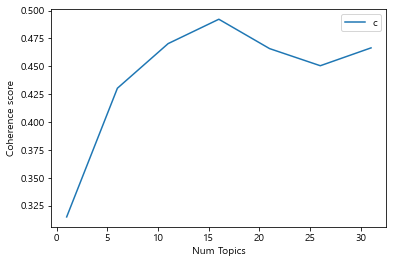

In [238]:
limit=36; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [239]:
for m, cv, cv2 in zip(x, coherence, model_list2):
    print("Num Topics =", m, " has Coherence of ", cv)
    print("Num Topics =", m, " has Perplexity of ", cv2)
    print("\n")

Num Topics = 1  has Coherence of  -0.903139015276658
Num Topics = 1  has Perplexity of  -8.141393486335325


Num Topics = 6  has Coherence of  -2.411634056980362
Num Topics = 6  has Perplexity of  -7.846715918639964


Num Topics = 11  has Coherence of  -3.0894080177958183
Num Topics = 11  has Perplexity of  -8.021515893275446


Num Topics = 16  has Coherence of  -3.219601351312706
Num Topics = 16  has Perplexity of  -9.69005160034775


Num Topics = 21  has Coherence of  -4.353678963525441
Num Topics = 21  has Perplexity of  -10.352282872202538


Num Topics = 26  has Coherence of  -3.7788935743865553
Num Topics = 26  has Perplexity of  -11.066745252658526


Num Topics = 31  has Coherence of  -4.4300755807571255
Num Topics = 31  has Perplexity of  -11.799949874674356




In [240]:
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=13, step=2)

1
3
5
7
9
11


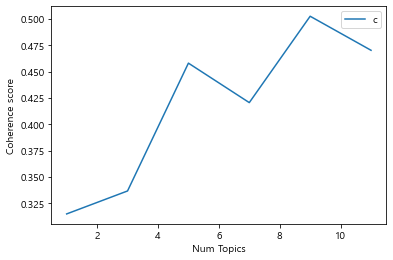

In [241]:
limit=13; start=1; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [242]:
for m, cv, cv2 in zip(x, coherence, model_list2):
    print("Num Topics =", m, " has Coherence of ", cv)
    print("Num Topics =", m, " has Perplexity of ", cv2)
    print("\n")

Num Topics = 1  has Coherence of  -0.903139015276658
Num Topics = 1  has Perplexity of  -8.141393486335325


Num Topics = 3  has Coherence of  -1.6930126798577696
Num Topics = 3  has Perplexity of  -7.980690577887666


Num Topics = 5  has Coherence of  -1.7989695057678385
Num Topics = 5  has Perplexity of  -7.8566721816162115


Num Topics = 7  has Coherence of  -3.7437716768307494
Num Topics = 7  has Perplexity of  -7.829239264464463


Num Topics = 9  has Coherence of  -2.9908987627304455
Num Topics = 9  has Perplexity of  -7.832530189406211


Num Topics = 11  has Coherence of  -3.0894080177958183
Num Topics = 11  has Perplexity of  -8.021515893275446




In [243]:
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=7, step=1)

1
2
3
4
5
6


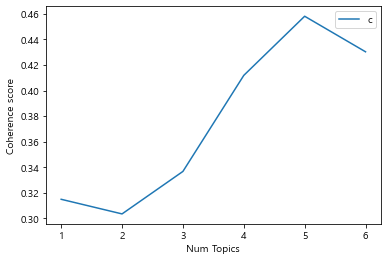

In [244]:
limit=7; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [245]:
for m, cv, cv2 in zip(x, coherence, model_list2):
    print("Num Topics =", m, " has Coherence of ", cv)
    print("Num Topics =", m, " has Perplexity of ", cv2)
    print("\n")

Num Topics = 1  has Coherence of  -0.903139015276658
Num Topics = 1  has Perplexity of  -8.141393486335325


Num Topics = 2  has Coherence of  -1.2350405721266196
Num Topics = 2  has Perplexity of  -8.012664662259413


Num Topics = 3  has Coherence of  -1.6930126798577696
Num Topics = 3  has Perplexity of  -7.980690577887666


Num Topics = 4  has Coherence of  -1.5502808832070012
Num Topics = 4  has Perplexity of  -7.907718104955588


Num Topics = 5  has Coherence of  -1.7989695057678385
Num Topics = 5  has Perplexity of  -7.8566721816162115


Num Topics = 6  has Coherence of  -2.411634056980362
Num Topics = 6  has Perplexity of  -7.846715918639964




In [246]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=11))

[(0,
  '0.008*"해양" + 0.006*"사업" + 0.005*"코로나" + 0.005*"회사" + 0.005*"치유" + '
  '0.004*"매출" + 0.004*"진행" + 0.004*"제품" + 0.004*"개발" + 0.004*"기업" + '
  '0.004*"건강"'),
 (1,
  '0.009*"제품" + 0.005*"기술" + 0.005*"디자인" + 0.004*"브랜드" + 0.004*"블루" + '
  '0.004*"코로나" + 0.004*"사용" + 0.004*"세계" + 0.004*"진행" + 0.004*"세트" + '
  '0.004*"적용"'),
 (2,
  '0.014*"지원" + 0.013*"청년" + 0.011*"사업" + 0.011*"기업" + 0.009*"기술" + 0.007*"투자" '
  '+ 0.007*"지역" + 0.006*"계획" + 0.006*"개발" + 0.006*"수소" + 0.006*"혁신"'),
 (3,
  '0.019*"청소년" + 0.019*"코로나" + 0.012*"센터" + 0.009*"활동" + 0.007*"지원" + '
  '0.007*"문화" + 0.006*"방역" + 0.006*"정신건강" + 0.006*"진행" + 0.006*"프로그램" + '
  '0.005*"운영"')]
